In [8]:
from pathlib import Path
import os, sys

path = Path(os.getcwd())
backtest_scripts = str(path.parent.absolute())+"/backtest"
os.chdir(backtest_scripts)
if backtest_scripts not in sys.path:
    sys.path.append(backtest_scripts)
print()

In [9]:
from cerebro import CerebroBT
from backtrader.feeds import YahooFinanceCSVData
import backtrader as bt

In [10]:
import pandas as pd
df = pd.read_csv(str(path.parent.absolute())+'/data/BTC-USD.csv')
#Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
print(df.drop('Date',axis=1))

                    Open          High           Low         Close  \
2021-10-10  54952.820313  56401.304688  54264.257813  54771.578125   
2021-10-11  54734.125000  57793.039063  54519.765625  57484.789063   
2021-10-12  57526.832031  57627.878906  54477.972656  56041.058594   
2021-10-13  56038.257813  57688.660156  54370.972656  57401.097656   
2021-10-14  57372.832031  58478.734375  56957.074219  57321.523438   
...                  ...           ...           ...           ...   
2022-10-06  20161.039063  20408.392578  19900.087891  19955.443359   
2022-10-07  19957.558594  20041.085938  19395.792969  19546.849609   
2022-10-08  19546.328125  19601.695313  19299.414063  19416.568359   
2022-10-09  19417.478516  19542.539063  19349.259766  19446.425781   
2022-10-10  19437.414063  19512.427734  19152.566406  19225.205078   

               Adj Close       Volume  
2021-10-10  54771.578125  39527792364  
2021-10-11  57484.789063  42637331698  
2021-10-12  56041.058594  41083758949  

In [11]:
 # cerebro class
cerebro_class = CerebroBT()
cerebro = cerebro_class.create_cerebro()

In [12]:
# data from CSV file - use days as time frame
# can be any yahoo finance csv data file - provide file path
data_path = str(path.parent.absolute())+'/data/BTC-USD.csv'
fin_data = YahooFinanceCSVData(dataname=data_path, timeframe=bt.TimeFrame.Days)
# add data to cerebro
cerebro_class.feed_cerebro(fin_data, cerebro)

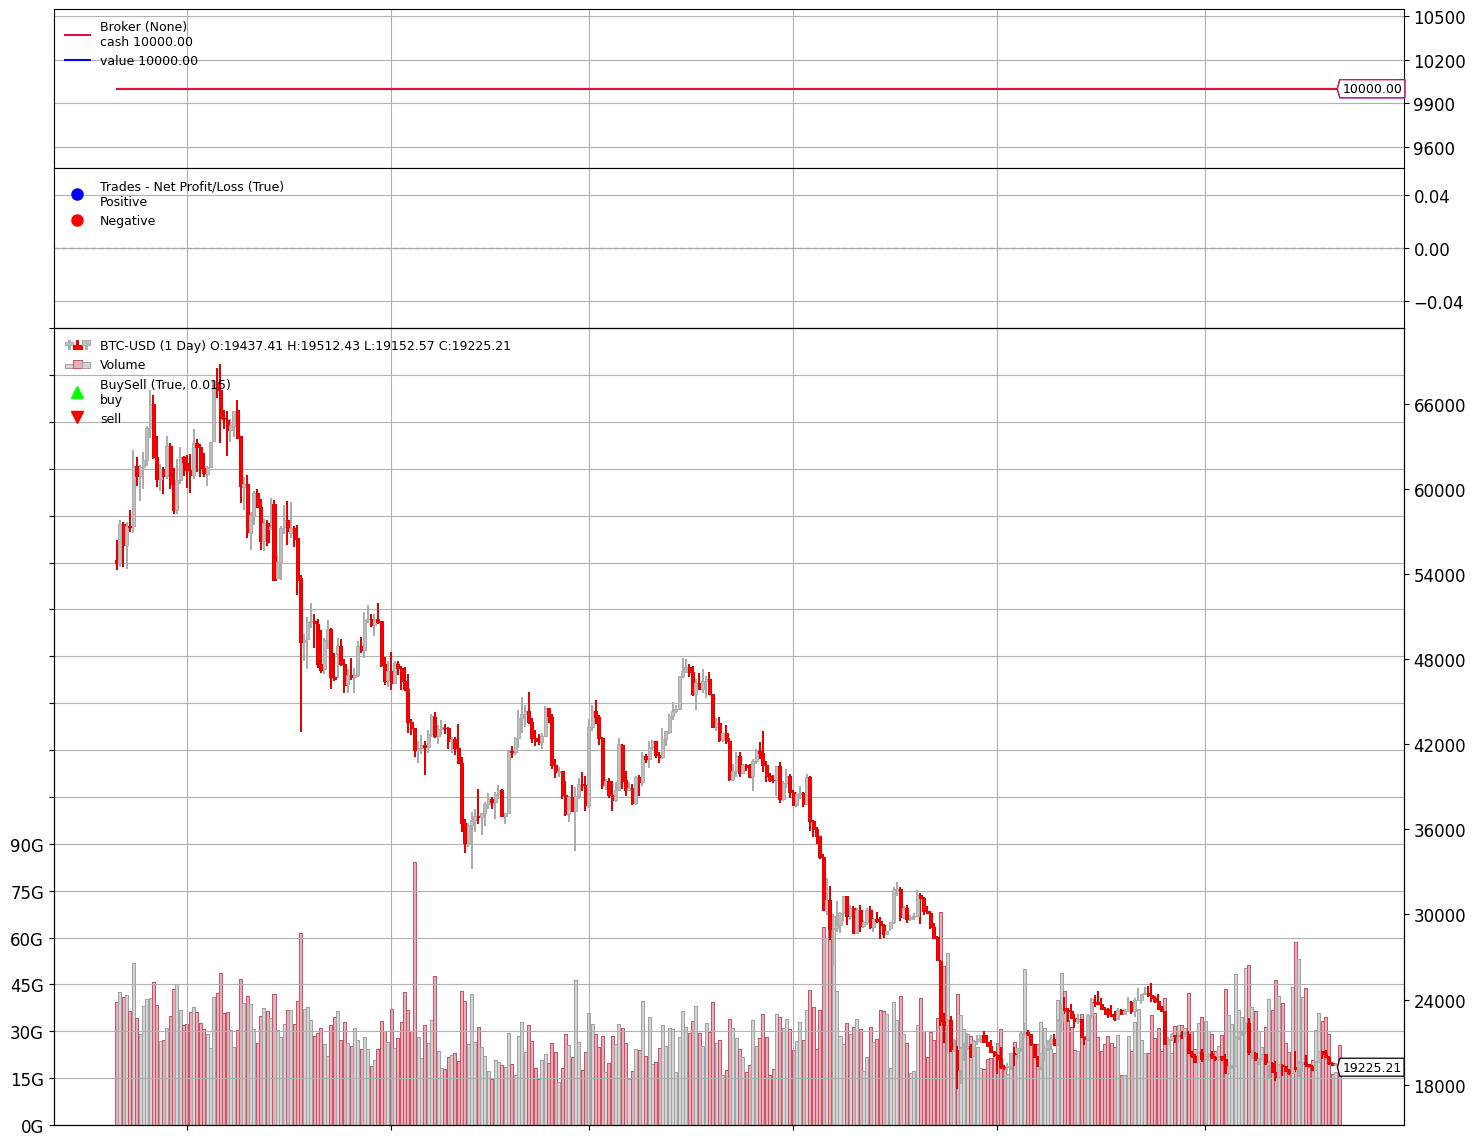

[[<Figure size 1500x1200 with 4 Axes>]]

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
# add strategy to cerebro
from obv_strategy import OBVStrategy
# obv_ind_class = OBVStrategy(df)
cerebro.addstrategy(OBVStrategy, df)
# run strategy and return all strategies added with addstrategy
# result will be a list of instances run during the backtesting
backtrading_result = cerebro.run()
# plotting result strategies
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12}) 
cerebro.plot(style='candlestick',iplot= False) # not an interactive plot